# Stock Market Analysis

Using pandas to get stock information, visualize different aspects of it, and analyze the risk of a stock from previous performance history. Then predicting using Monte Carlo Method

Info that would be visualized 

1. Change in price over time
2. Daily return of the stock market average
3. Moving average of the various stocks
4. Correlation between different stocks' closing price
5. Correlation between different stocks' daily returns
6. Value that should be put at risk when investing a certain stock
7. How to predict future stock behaviour 

In [19]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#For reading stock data 

from pandas_datareader import data, wb
import pandas_datareader as pdr
#For time stamps 
from datetime import datetime 
#Division
from __future__ import division 

In [13]:
#Using Yahoo to grab stock information

tech_stock = ['GOOG','MSFT','AMZN','AAPL']

In [14]:
end = datetime.now()
#Setting start and end date (a year ago now)
start = datetime(end.year - 1, end.month, end.day)

In [21]:
#Setting up Yahoo's financial data as a dataframe 

for stock in tech_stock:
    globals()[stock] = pdr.get_data_yahoo(stock, start,end)

In [25]:
AAPL.describe() #Statistics on Apple stocks 

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,141.341315,142.295060,140.435937,141.474103,140.677993,2.793747e+07
std,16.902716,16.923112,16.647013,16.736888,17.202225,1.190328e+07
min,106.570000,107.680000,104.080002,105.709999,104.410980,1.147590e+07
25%,130.944999,132.154998,130.784996,131.784996,130.165566,2.067555e+07
50%,144.449997,145.300003,143.449997,144.289993,143.610962,2.533170e+07
75%,154.799995,155.470001,153.805001,154.735001,154.431870,3.221495e+07
max,174.000000,174.259995,171.119995,172.500000,172.500000,1.119850e+08


In [27]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2016-11-07 to 2017-11-03
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


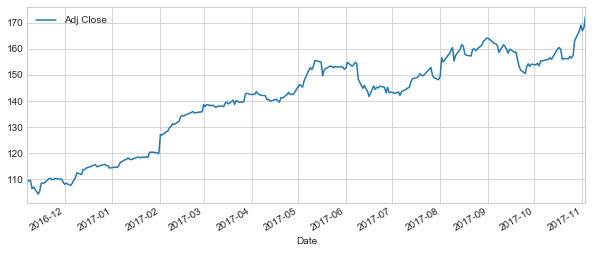

In [28]:
#Historical view on closing price
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

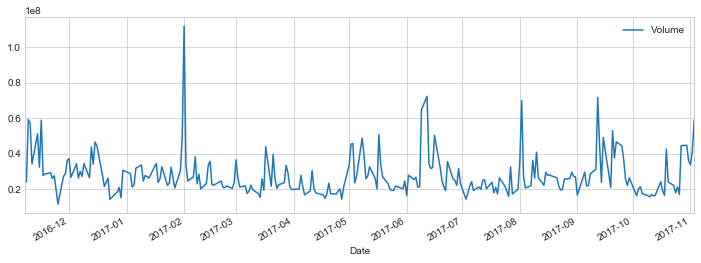

In [34]:
#Total volume of stock being traded each day over the course of 5 years
AAPL['Volume'].plot(legend=True,figsize=(12,4))

In [62]:
#Calculating three moving averages 
#MA = Moving Average
ma_day = [5,10,15,20]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = Series.rolling(AAPL['Adj Close'],ma).mean()


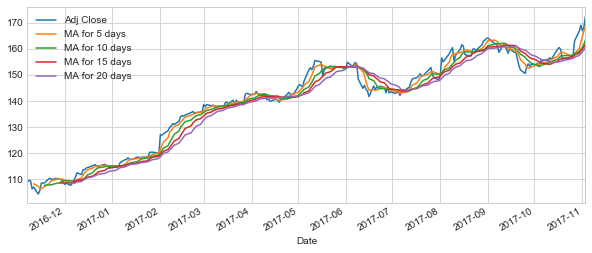

In [63]:
AAPL[['Adj Close','MA for 5 days','MA for 10 days','MA for 15 days','MA for 20 days']].plot(subplots=False,figsize=(10,4))

## Daily Return Analysis

- Daily Changes of stocks

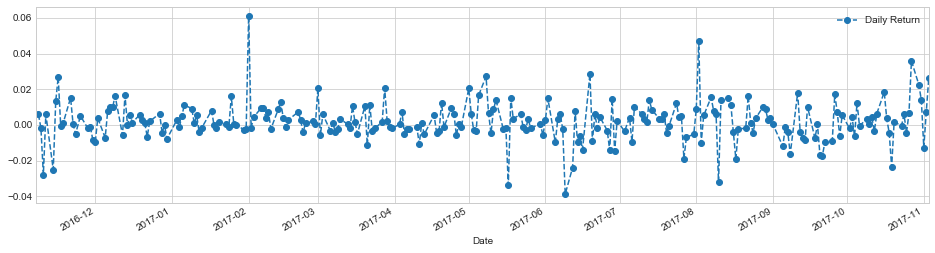

In [68]:
#Percent Change for each day 

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(16,4),legend=True,linestyle='--',marker='o')

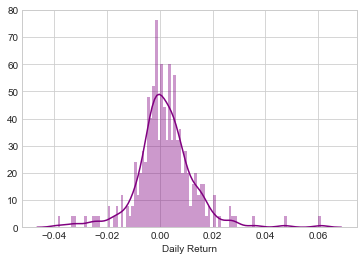

In [73]:
#Seaborn does not recongize null values so I have to use dropna()
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

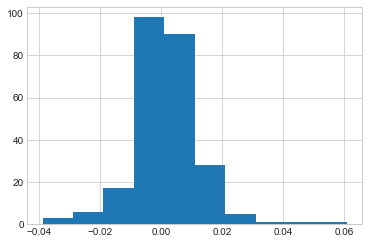

In [74]:
#Using a histogram plot
AAPL['Daily Return'].hist()

In [75]:
# Grab all the closing prices for the tech stock list into one DataFrame
closingPrice_dataFrame = pdr.get_data_yahoo(['AAPL','MSFT','AMZN','GOOG'],start,end)['Adj Close']

In [76]:
closingPrice_dataFrame.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-03,172.500000,1111.599976,1032.479980,84.139999
2017-11-02,168.110001,1094.219971,1025.579956,84.050003
2017-11-01,166.889999,1103.680054,1025.500000,83.180000
2017-10-31,169.039993,1105.280029,1016.640015,83.180000
2017-10-30,166.720001,1110.849976,1017.109985,83.889999


In [77]:
techReturns_dataFrame = closingPrice_dataFrame.pct_change()

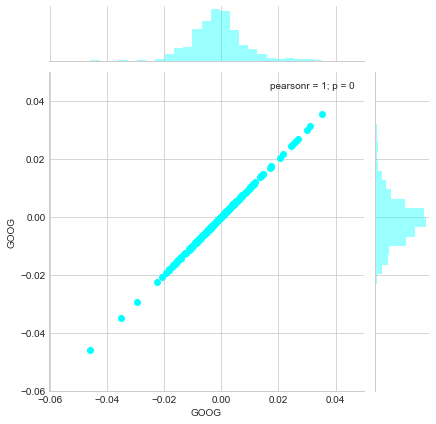

In [79]:
#Comparing Google to Google
sns.jointplot('GOOG','GOOG',techReturns_dataFrame,kind='scatter',color='cyan')

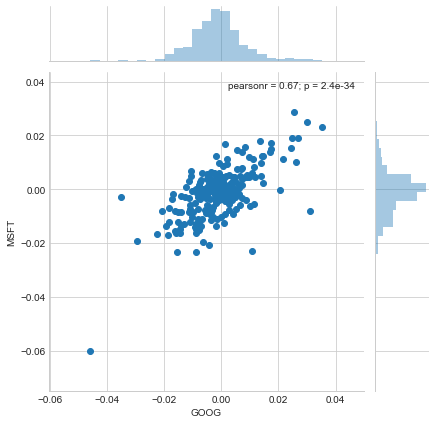

In [80]:
#Dealing with correlations now 
#Comparing Google with microsoft and seeing if there's any correlation 
sns.jointplot('GOOG','MSFT',techReturns_dataFrame,kind='scatter')

From what is presented above, there seem to be some sort of correlation forming

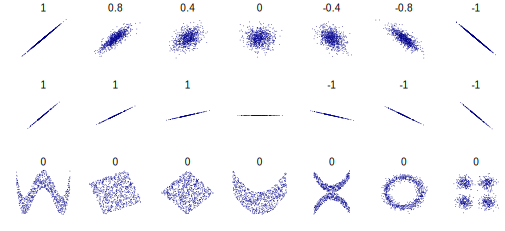

In [81]:
#A sense of what's correlated and what is not
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

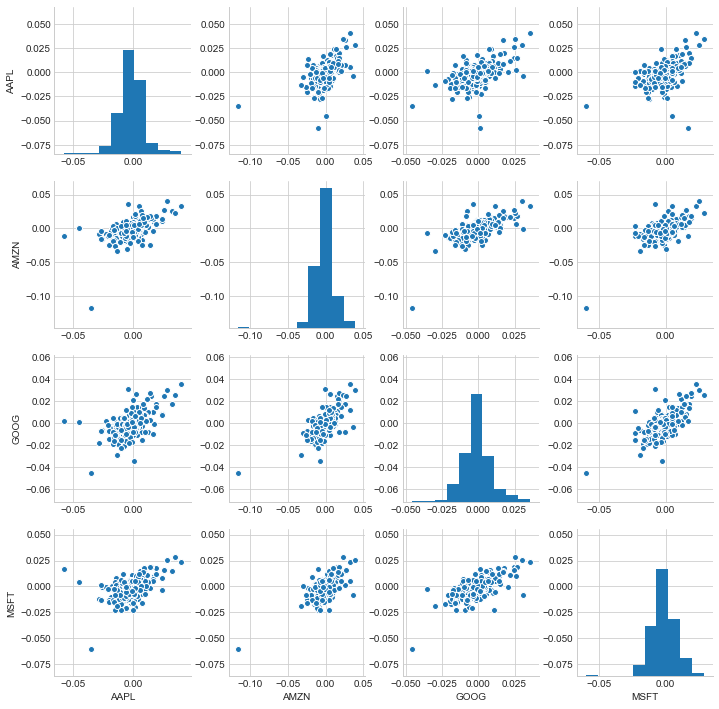

In [85]:
#To see the correlation for all the companies all at once
sns.pairplot(techReturns_dataFrame.dropna())

### Above are all the daily returns between on stocks (correlation) 

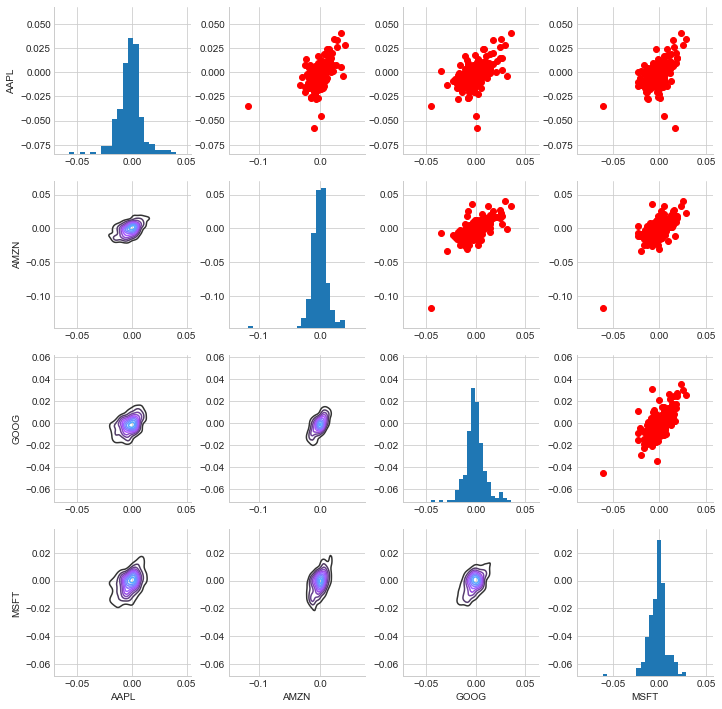

In [87]:
#Full control of the figure, including the upper triangle, and the lower triangle
fig = sns.PairGrid(techReturns_dataFrame.dropna())

fig.map_upper(plt.scatter,color='red')
fig.map_lower(sns.kdeplot,cmap='cool_d')
fig.map_diag(plt.hist,bins=20)

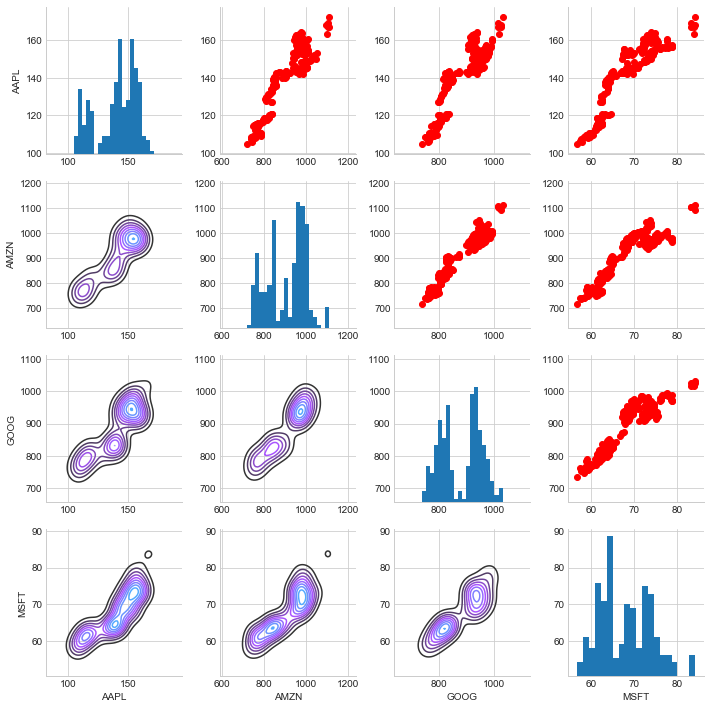

In [92]:
#Correlation of closing price
fig = sns.PairGrid(closingPrice_dataFrame.dropna())

fig.map_upper(plt.scatter,color='red')
fig.map_lower(sns.kdeplot,cmap='cool_d')
fig.map_diag(plt.hist,bins=20)

## Risk Analysis 

- Gathering daily percentage returns by comparing the expected return with the standard deviation of the daily returns

In [99]:
returns = techReturns_dataFrame.dropna()

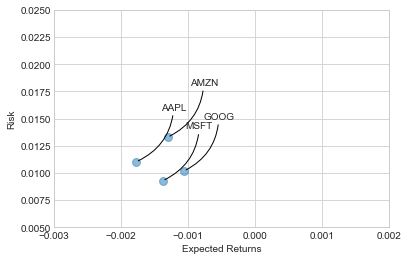

In [107]:
plt.scatter(returns.mean(), returns.std(), alpha=0.5,s = np.pi*20)
#Setting limits
plt.ylim([0.005,0.025])
plt.xlim([-0.003,0.002])

#Set the plot axis titles
plt.xlabel('Expected Returns')
plt.ylabel('Risk')

#Labelling the scatterplots:  http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))